In [1]:
import os

import pandas as pd
import numpy as np

import datetime as dt

from flask import jsonify

In [2]:
data = pd.read_csv("./db/Bakery_Data.csv")

In [3]:
data.head()

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam


In [4]:
data["Time"] = pd.to_datetime(data["Time"])
data["Hour"] = data["Time"].dt.hour

In [5]:
data["Date"] = pd.to_datetime(data["Date"])

In [6]:
data["Day_of_Week"] = data["Date"].dt.weekday_name

In [7]:
days = {'Sunday':'Weekend', 'Monday':'Weekday', 'Tuesday':'Weekday', 'Wednesday':'Weekday',
        'Thursday':'Weekday', 'Friday':'Weekday', 'Saturday':'Weekend'}

data['Weekend'] = data['Day_of_Week'].apply(lambda x: days[x])


In [8]:
data.head()

,Date,Time,Transaction,Item,Hour,Day_of_Week,Weekend
0,2016-10-30,2018-10-23 09:58:11,1,Bread,9,Sunday,Weekend
1,2016-10-30,2018-10-23 10:05:34,2,Scandinavian,10,Sunday,Weekend
2,2016-10-30,2018-10-23 10:05:34,2,Scandinavian,10,Sunday,Weekend
3,2016-10-30,2018-10-23 10:07:57,3,Hot chocolate,10,Sunday,Weekend
4,2016-10-30,2018-10-23 10:07:57,3,Jam,10,Sunday,Weekend


In [9]:
# Daily customers
customers = data.groupby(['Date'])['Transaction'].max().reset_index()

In [10]:
customers.columns = ['Date','Cumulative Customers']

In [11]:
customers['Daily Customers'] = customers['Cumulative Customers'].diff()
customers.iloc[0,2] = customers.iloc[0,1]

In [12]:
customers.head()

,Date,Cumulative Customers,Daily Customers
0,2016-10-30,80,80.0
1,2016-10-31,176,96.0
2,2016-11-01,254,78.0
3,2016-11-02,339,85.0
4,2016-11-03,436,97.0


In [13]:
customers.plot(x='Date', y = 'Daily Customers')

In [14]:
hourly = data
hourly.head()

,Date,Time,Transaction,Item,Hour,Day_of_Week,Weekend
0,2016-10-30,2018-10-23 09:58:11,1,Bread,9,Sunday,Weekend
1,2016-10-30,2018-10-23 10:05:34,2,Scandinavian,10,Sunday,Weekend
2,2016-10-30,2018-10-23 10:05:34,2,Scandinavian,10,Sunday,Weekend
3,2016-10-30,2018-10-23 10:07:57,3,Hot chocolate,10,Sunday,Weekend
4,2016-10-30,2018-10-23 10:07:57,3,Jam,10,Sunday,Weekend


In [15]:
hd = hourly.groupby(['Hour'])['Transaction'].count()


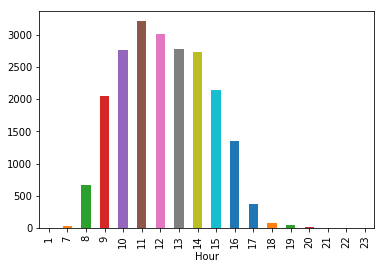

In [16]:
hd.plot.bar(y = 'Transaction')

In [17]:
data.to_csv("Bakery_Dataset.csv")

In [19]:
os.getcwd()

'C:\\Users\\andre\\OneDrive\\Projects\\Project2'